# Evolution

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#takes too much time
Occitania_2017 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0__SHP_LAMB93_R76-2017_2017-01-01.7z/PARCELLES_GRAPHIQUES.shp")
Occitania_2018 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0__SHP_LAMB93_R76-2018_2018-01-15.7z/PARCELLES_GRAPHIQUES.shp")
Occitania_2019 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0__SHP_LAMB93_R76-2019_2019-01-15/PARCELLES_GRAPHIQUES.shp")
Occitania_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0_SHP_LAMB93_R76_2020/PARCELLES_GRAPHIQUES.shp")

In [3]:
#takes too much time
Catalunya_2017 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2017_SHP/Cultius_DUN2017.shp")
Catalunya_2018 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2018/Cultius_DUN2018.shp")
Catalunya_2019 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2019/Cultius_DUN2019.shp")
Catalunya_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2020_SHP/Cultius_DUN2020.shp")

In [2]:
Occitania_2019 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0__SHP_LAMB93_R76-2019_2019-01-15/PARCELLES_GRAPHIQUES.shp")
Occitania_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/RPG_2-0_SHP_LAMB93_R76_2020/PARCELLES_GRAPHIQUES.shp")

In [3]:
Catalunya_2019 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2019/Cultius_DUN2019.shp")
Catalunya_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/Agrivolution/data/shp/Cultius_DUN2020_SHP/Cultius_DUN2020.shp")

{2017: 900419.4800000001, 2018: 904630.55, 2019: 920344.78, 2020: 927446.9400000001}


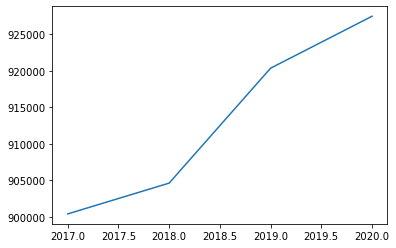

In [4]:
evol_OCC={}
guarrigue_2017 = Occitania_2017.loc[Occitania_2017.loc[:,"CODE_GROUP"]=="17"]
surf_guarrigue_2017 = guarrigue_2017["SURF_PARC"].sum()
evol_OCC[2017] = surf_guarrigue_2017

guarrigue_2018 = Occitania_2018.loc[Occitania_2018.loc[:,"CODE_GROUP"]=="17"]
surf_guarrigue_2018 = guarrigue_2018["SURF_PARC"].sum()
evol_OCC[2018] = surf_guarrigue_2018

guarrigue_2019 = Occitania_2019.loc[Occitania_2019.loc[:,"CODE_GROUP"]=="17"]
surf_guarrigue_2019 = guarrigue_2019["SURF_PARC"].sum()
evol_OCC[2019] = surf_guarrigue_2019

guarrigue_2020 = Occitania_2020.loc[Occitania_2020.loc[:,"CODE_GROUP"]=="17"]
surf_guarrigue_2020 = guarrigue_2020["SURF_PARC"].sum()
evol_OCC[2020] = surf_guarrigue_2020

print(evol_OCC)
lists = sorted(evol_OCC.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [4]:
icc_df = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/ICC/ICC_src.csv", encoding= 'unicode_escape')
icc_df['code'] = icc_df['code'].astype('str')

mask_0 = (icc_df['code'].str.len() == 1)
LEVEL_0 = icc_df.loc[mask_0]
LEVEL_0.drop(['broader'],axis=1,inplace=True)
LEVEL_0.set_index('code', inplace = True)
d_icc_0 = LEVEL_0.to_dict('dict')
group_dict_icc_0 = d_icc_0['label_en']

/tmp/ipykernel_3097/2241554060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEVEL_0.drop(['broader'],axis=1,inplace=True)


In [4]:
conversion_fr_icc = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/FR/handmade_Nicolas_light.csv", encoding= 'unicode_escape')
conversion_fr_icc['ID_GROUP_ICC'] = conversion_fr_icc['ICC1.1'].str[:1]
conversion_fr_icc.drop(['ICC1.1'],axis=1, inplace=True)
conversion_fr_icc.rename(columns = {'ID_CROPS_FR':'CODE_CULTU'}, inplace=True)

In [6]:
Occ_2019_icc_merged = Occitania_2019.merge(conversion_fr_icc, how='left', on='CODE_CULTU')
Occ_2019_icc = Occ_2019_icc_merged[['ID_GROUP_ICC', 'SURF_PARC']]
Occ_2019_icc

Occ_2020_icc_merged = Occitania_2020.merge(conversion_fr_icc, how='left', on='CODE_CULTU')
Occ_2020_icc = Occ_2020_icc_merged[['ID_GROUP_ICC', 'SURF_PARC']]
Occ_2020_icc

,ID_GROUP_ICC,SURF_PARC
0,9,0.06
1,9,4.66
2,9,3.51
3,9,4.94
4,9,2.80
...,...,...
1602492,#,0.01
1602493,9,1.34
1602494,9,0.60
1602495,9,1.47


In [7]:
evol_OCC = {}
surf_tot_occ_2019 = Occ_2019_icc["SURF_PARC"].sum()
oil_occ_2019 = Occ_2019_icc.loc[Occ_2019_icc.loc[:,"ID_GROUP_ICC"]=="4"]
surf_oil_occ_2019 = oil_occ_2019["SURF_PARC"].sum()
evol_OCC[2019] = (surf_oil_occ_2019*100)/surf_tot_occ_2019

surf_tot_occ_2020 = Occ_2020_icc["SURF_PARC"].sum()
oil_occ_2020 = Occ_2020_icc.loc[Occ_2020_icc.loc[:,"ID_GROUP_ICC"]=="4"]
surf_oil_occ_2020 = oil_occ_2020["SURF_PARC"].sum()
evol_OCC[2020] = (surf_oil_occ_2020*100)/surf_tot_occ_2020

evol_OCC

{2019: 7.537146022817698, 2020: 8.544824312180495}

In [8]:
conversion_cat_icc = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/CAT/handmade_Nicolas_light.csv", encoding= 'unicode_escape')
conversion_cat_icc['ID_GROUP_ICC'] = conversion_cat_icc['ICC1.1'].str[:1]
conversion_cat_icc.drop(['ICC1.1'],axis=1, inplace=True)
conversion_cat_icc.rename(columns = {'ID_CROPS_CAT':'Cultiu'}, inplace=True)

In [9]:
Catalunya_2019['Cultiu'] = Catalunya_2019['Cultiu'].str.lower()
Cat_2019_icc = Catalunya_2019.merge(conversion_cat_icc, how='left', on='Cultiu')
Cat_2019_icc.rename(columns={'HA':'SURF_PARC'},inplace=True)
Cat_2019_icc = Cat_2019_icc[['ID_GROUP_ICC', 'SURF_PARC']]


Catalunya_2020['Cultiu'] = Catalunya_2020['Cultiu'].str.lower()
Cat_2020_icc = Catalunya_2020.merge(conversion_cat_icc, how='left', on='Cultiu')
Cat_2020_icc.rename(columns={'HA':'SURF_PARC'},inplace=True)
Cat_2020_icc = Cat_2020_icc[['ID_GROUP_ICC', 'SURF_PARC']]

In [10]:
evol_CAT = {}
surf_tot_cat_2019 = Cat_2019_icc["SURF_PARC"].sum()
oil_cat_2019 = Cat_2019_icc.loc[Cat_2019_icc.loc[:,"ID_GROUP_ICC"]=="4"]
surf_oil_cat_2019 = oil_cat_2019["SURF_PARC"].sum()
evol_CAT[2019] = (surf_oil_cat_2019*100)/surf_tot_cat_2019

surf_tot_cat_2020 = Cat_2020_icc["SURF_PARC"].sum()
oil_cat_2020 = Cat_2020_icc.loc[Cat_2020_icc.loc[:,"ID_GROUP_ICC"]=="4"]
surf_oil_cat_2020 = oil_cat_2020["SURF_PARC"].sum()
evol_CAT[2020] = (surf_oil_cat_2020*100)/surf_tot_cat_2020

evol_CAT

{2019: 13.823208351844992, 2020: 13.951333580656291}

In [19]:
group_dict_icc_0['#']='no_match'
group_dict_icc_0

{'1': 'Cereals',
 '2': 'Vegetables and melons',
 '3': 'Fruit and nuts',
 '4': 'Oilseed crops and oleaginous fruits',
 '5': 'Root/tuber crops with high starch or inulin content',
 '6': 'Stimulant, spice and aromatic crops',
 '7': 'Leguminous crops',
 '8': 'Sugar crops',
 '9': 'Other crops',
 '#': 'no_match'}

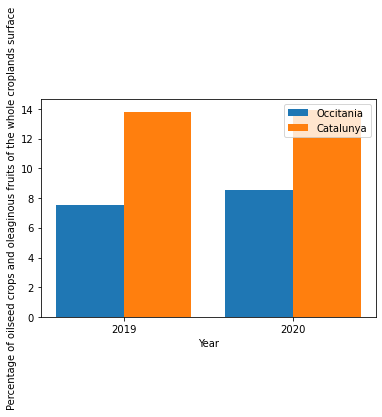

In [13]:
X = ['2019','2020']
Occ = [evol_OCC[2019], evol_OCC[2020]]
Cat = [evol_CAT[2019], evol_CAT[2020]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Occ, 0.4, label = 'Occitania')
plt.bar(X_axis + 0.2, Cat, 0.4, label = 'Catalunya')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Percentage of oilseed crops and oleaginous fruits of the whole croplands surface")
#plt.title("Compare evolution of oilseed crops surface between 2019 and 2020 in Catalunya and Occitania. ")
plt.legend()
plt.show()

900419.4800000001
904630.55
920344.78
927446.9400000001


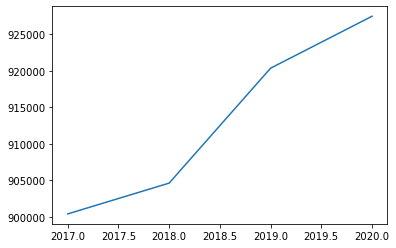

In [19]:
#working
my_list=[]
for df in [Occitania_2017, Occitania_2018, Occitania_2019, Occitania_2020]:
    guarrigue = df.loc[df.loc[:,"CODE_GROUP"]=="17"]
    surf_guarrigue = guarrigue["SURF_PARC"].sum()
    print(surf_guarrigue)
    my_list.append(surf_guarrigue)
#guarrigue_2017_2020
plt.plot([2017,2018,2019,2020],my_list)

<BarContainer object of 4 artists>

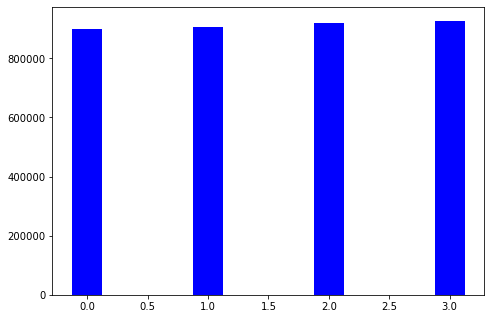

In [18]:
data = [my_list]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
#ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

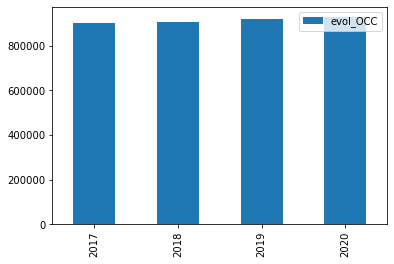

In [27]:
evol = {}
evol['evol_OCC'] = evol_OCC
pd.DataFrame(evol).plot(kind='bar')
plt.show()